In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

from sklearn import preprocessing
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

from kmodes.kmodes import KModes

%matplotlib inline

In [44]:
df_master = pd.read_csv('data_siswa.csv',sep=';')

#master data kode inisialisasi
agama = pd.read_csv('agama.csv',sep=';').set_index('agama').to_dict()['inisial']
kota_kelahiran = pd.read_csv('kota_kelahiran.csv',sep=';').set_index('kota_kelahiran').to_dict()['inisial']
kecamatan = pd.read_csv('kecamatan.csv',sep=';').set_index('kecamatan').to_dict()['inisial']
tahun_angkatan = pd.read_csv('tahun_angkatan.csv',sep=';').set_index('tahun_angkatan').to_dict()['inisial']
tahun_raport = pd.read_csv('tahun_raport.csv',sep=';').set_index('tahun_raport').to_dict()['inisial']
asal_sekolah = pd.read_csv('asal_sekolah.csv',sep=';').set_index('asal_sekolah').to_dict()['inisial']
bidang_studi_keahlian = pd.read_csv('bidang_studi_keahlian.csv',sep=';').set_index('bidang_studi_keahlian').to_dict()['inisial']
program_studi_keahlian = pd.read_csv('program_studi_keahlian.csv',sep=';').set_index('program_studi_keahlian').to_dict()['inisial']
kompetensi_keahlian = pd.read_csv('kompetensi_keahlian.csv',sep=';').set_index('kompetensi_keahlian').to_dict()['inisial']

def proses_data(df_org):
    df = df_org.copy()
    df['agama'] = df['agama'].str.lower().replace(agama)
    df['jenis kelamin']= df['jenis kelamin'].str.lower().replace({'p':1, 'l': 2})
    df['kota lahir'] = df['kota lahir'].str.lower().replace(kota_kelahiran)
    df['kecamatan'] = df['kecamatan'].str.lower().replace(kecamatan)
    df['tahun raport 3'] = df['tahun raport 3'].replace(tahun_raport)
    df['angkatan'] = df['angkatan'].replace(tahun_angkatan)
    df['bidang studi keahlian'] = df['bidang studi keahlian'].str.lower().replace(bidang_studi_keahlian)
    df['program studi keahlian'] = df['program studi keahlian'].str.lower().replace(program_studi_keahlian)
    df['kompetensi keahlian'] = df['kompetensi keahlian'].str.lower().replace(kompetensi_keahlian)
    df['asal sekolah'] = df['asal sekolah'].str.lower().replace(asal_sekolah)
    df = df.drop(['no','nama peserta didik'],axis=1)
    return df

df = proses_data(df_master)



In [55]:
df_master.head()

,no,nama peserta didik,jenis kelamin,kota lahir,agama,kecamatan,angkatan,tahun raport 3,bidang studi keahlian,program studi keahlian,kompetensi keahlian,asal sekolah,x1,y1,cluster
0,1,Angel Frestika Setiady,P,Jakarta,Budha,Cengkareng,2018,2020,Bisnis dan manajemen,Akuntansi dan keuangan,Akuntansi dan keuangan lembaga,SMP Yadika 2,-36.381302,-4.924315,1
1,2,Angelia Lay,P,Jakarta,Budha,Kalideres,2018,2020,Bisnis dan manajemen,Akuntansi dan keuangan,Akuntansi dan keuangan lembaga,SMP Yadika 2,-36.411807,-4.853338,1
2,3,Angelika,P,Jakarta,Budha,Kalideres,2018,2020,Bisnis dan manajemen,Akuntansi dan keuangan,Akuntansi dan keuangan lembaga,SMPN 278 Jakarta,-45.410282,-4.716292,1
3,4,Antoni,L,Tangerang,Budha,Cengkareng,2018,2020,Bisnis dan manajemen,Akuntansi dan keuangan,Akuntansi dan keuangan lembaga,SMP Strada Pelita II,-29.738105,36.975436,3
4,5,Apriyani Legisti,P,Jakarta,Islam,Kalideres,2018,2020,Bisnis dan manajemen,Akuntansi dan keuangan,Akuntansi dan keuangan lembaga,SMP 120,46.587111,-6.139959,4


In [46]:
df_master.columns

Index(['no', 'nama peserta didik', 'jenis kelamin', 'kota lahir', 'agama',
       'kecamatan', 'angkatan', 'tahun raport 3', 'bidang studi keahlian',
       'program studi keahlian', 'kompetensi keahlian', 'asal sekolah'],
      dtype='object')

In [47]:
#df.to_csv('data_ready.csv',index=False)

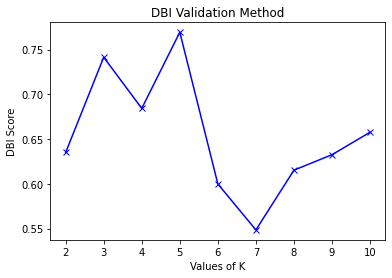

In [48]:
dbi = []
K = range(2, 11) # perhitungan DBI dari 2
 
for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(df)
    kmeanModel.fit(df)
    dbi.append(metrics.davies_bouldin_score(df,kmeanModel.labels_))
    
plt.plot(K, dbi, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('DBI Score')
plt.title('DBI Validation Method')
plt.show()

In [49]:
tmp = pd.DataFrame()
tmp['K'] = K
tmp['dbi'] = dbi
tmp

,K,dbi
0,2,0.635089
1,3,0.741507
2,4,0.684332
3,5,0.769454
4,6,0.599900
5,7,0.548520
6,8,0.615288
7,9,0.632581
8,10,0.657688


## input nilai K

In [50]:
k_value = 7
#k_value = int(input("Nilai K =") or "7")

In [51]:
pca = PCA(2) #mengubah menajdi 2 kolom
df = pca.fit_transform(df) #Transform data


model = KMeans(n_clusters=k_value,verbose=True,random_state=101) 
model.fit(df)
#pickle.dump(model, open('model'+str(k_value)+'.pkl', 'wb'))

Initialization complete
Iteration 0, inertia 77211.59910098782
Iteration 1, inertia 51049.528953945126
Iteration 2, inertia 49075.908224646635
Iteration 3, inertia 48127.611895603266
Iteration 4, inertia 47308.67091398506
Iteration 5, inertia 45949.15723885848
Iteration 6, inertia 45707.55615213546
Iteration 7, inertia 45686.85722023178
Iteration 8, inertia 45677.711043513555
Converged at iteration 8: strict convergence.
Initialization complete
Iteration 0, inertia 53522.82794580085
Iteration 1, inertia 40529.69405002764
Iteration 2, inertia 39306.974691425174
Iteration 3, inertia 38562.47158206992
Iteration 4, inertia 38051.310152807906
Iteration 5, inertia 38033.84360315156
Converged at iteration 5: strict convergence.
Initialization complete
Iteration 0, inertia 52547.073296357965
Iteration 1, inertia 45500.8639847287
Iteration 2, inertia 44112.40297101784
Iteration 3, inertia 44028.71234048139
Converged at iteration 3: center shift 0.02746477076314559 within tolerance 0.06740637487

KMeans(n_clusters=7, random_state=101, verbose=True)

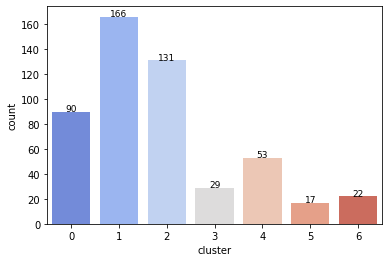

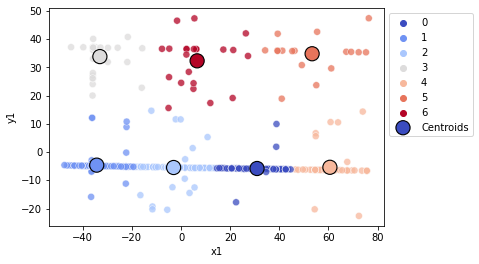

In [52]:
label = model.predict(df)
center = model.cluster_centers_
df_master['x1'] = df[:,0]
df_master['y1'] = df[:,1]
df_master['cluster'] = label

palet = 'coolwarm'
ax = sns.countplot(x ='cluster', data=df_master,palette=palet)
for rect in ax.patches:
    ax.text (rect.get_x() + rect.get_width()  / 2,rect.get_height()+ 0.25,rect.get_height(),horizontalalignment='center', fontsize = 9)
plt.show()

ax = sns.scatterplot(x='x1', y='y1',hue='cluster',data=df_master,alpha=0.75, s=50,palette=palet)
ax = sns.scatterplot(x=center[:, 0], y=center[:, 1],hue=range(k_value), s=200, ec='black',palette=palet, legend=False,label = 'Centroids', ax=ax)
plt.legend(bbox_to_anchor=(1,1), loc="upper left")
plt.show()

In [53]:
cols = ['jenis kelamin', 'kota lahir', 'agama',
       'kecamatan', 'angkatan', 'tahun raport 3', 'bidang studi keahlian',
       'program studi keahlian', 'kompetensi keahlian', 'asal sekolah']

arr_cluster = {}
cluster = df_master['cluster'].unique()
cluster.sort()



for x in cluster:
    clu = df_master.loc[df_master['cluster'] == x]
    idx = 'cluster '+str(x)
    arr_mode = arr_cluster[idx] = {}
    arr_mode['jenis kelamin'] = clu['jenis kelamin'].mode().iat[0]
    arr_mode['kota lahir'] = clu['kota lahir'].mode().iat[0]
    arr_mode['kecamatan'] = clu['kecamatan'].mode().iat[0]
    arr_mode['agama'] = clu['agama'].mode().iat[0]
    arr_mode['angkatan'] = clu['angkatan'].mode().iat[0]
    arr_mode['tahun raport 3'] = clu['tahun raport 3'].mode().iat[0]
    arr_mode['bidang studi keahlian'] = clu['bidang studi keahlian'].mode().iat[0]
    arr_mode['program studi keahlian'] = clu['program studi keahlian'].mode().iat[0]
    arr_mode['kompetensi keahlian'] = clu['kompetensi keahlian'].mode().iat[0]
    arr_mode['asal sekolah'] = clu['asal sekolah'].mode().iat[0]
    
df_cluster = pd.DataFrame(arr_cluster)
df_cluster

,cluster 0,cluster 1,cluster 2,cluster 3,cluster 4,cluster 5,cluster 6
jenis kelamin,P,P,P,P,P,P,P
kota lahir,Jakarta,Jakarta,Jakarta,Tangerang,Jakarta,Tangerang,Tangerang
kecamatan,Kalideres,Kalideres,Kalideres,Kalideres,Kalideres,Kalideres,Cengkareng
agama,Islam,Islam,Islam,Kristen,Islam,Islam,Islam
angkatan,2018,2019,2018,2018,2019,2018,2018
tahun raport 3,2020,2021,2020,2020,2021,2020,2020
bidang studi keahlian,Bisnis dan manajemen,Bisnis dan manajemen,Bisnis dan manajemen,Bisnis dan manajemen,Bisnis dan manajemen,Bisnis dan manajemen,Bisnis dan Manajemen
program studi keahlian,Akuntansi dan keuangan,Akuntansi dan keuangan,Akuntansi dan keuangan,Akuntansi dan keuangan,Manajemen Perkantoran,Akuntansi dan keuangan,manajemen perkantoran
kompetensi keahlian,Akuntansi dan keuangan lembaga,Akuntansi dan keuangan lembaga,Akuntansi dan keuangan lembaga,Akuntansi dan keuangan lembaga,Otomatisasi dan Tata Kelola Perkantoran,Akuntansi dan keuangan lembaga,otomatisasi dan tata kelola perkantoran
asal sekolah,SMP Citra Utama,SMP Yadika 2,SMP N 278,SMP Yadika 2,MTs. Tahdzibun Nufus,SMP Al Qomar,SMP N 122


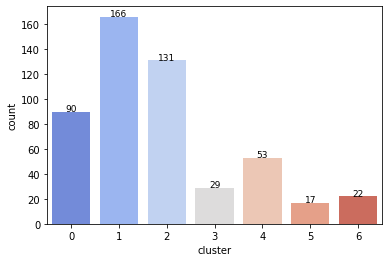

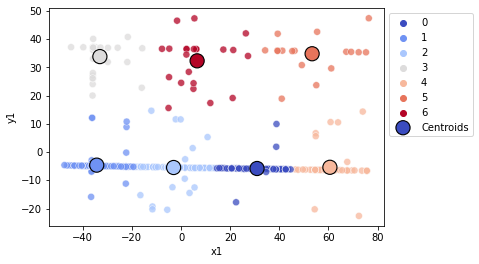

In [54]:
#using pickle mode

df_master2 = pd.read_csv('data_siswa.csv',sep=';')
df2 = proses_data(df_master2)
pca = PCA(2) 
df2 = pca.fit_transform(df2)
model2 = pickle.load(open('model7.pkl', 'rb'))
cluster2 = model2.predict(df2)
center2 = model2.cluster_centers_

df_master2['x1'] = df2[:,0]
df_master2['y1'] = df2[:,1]
df_master2['cluster'] = cluster2
k_value2 = len(df_master2['cluster'].unique())

palet = 'coolwarm'
ax =sns.countplot(x ='cluster', data=df_master2,palette=palet)
for rect in ax.patches:
    ax.text (rect.get_x() + rect.get_width()  / 2,rect.get_height()+ 0.25,rect.get_height(),horizontalalignment='center', fontsize = 9)
plt.show()

ax = sns.scatterplot(x='x1', y='y1',hue='cluster',data=df_master2,alpha=0.75, s=50,palette=palet)
ax = sns.scatterplot(x=center2[:, 0], y=center2[:, 1],hue=range(k_value2), s=200, ec='black',palette=palet, legend=False,label = 'Centroids', ax=ax)
plt.legend(bbox_to_anchor=(1,1), loc="upper left")
plt.show()